In [1]:
# #This notebook has 3 parts
# 1. feature Engineering
# 2. Neural network Creation
# 3. Strategy Backtesting

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')


In [7]:
# sns.set??
df = pd.read_csv('EURUSD_data.csv' , index_col = 0, parse_dates = True)


In [11]:
data = df.copy()

print(data.shape[0])

print(data.shape[1])

2343
6


In [12]:
data.head()

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2009-12-31  1.434206  1.443897  1.431045  1.432706   1.432706       0
2010-01-01  1.432706  1.440196  1.432706  1.438994   1.438994       0
2010-01-04  1.431004  1.445191  1.426208  1.442398   1.442398       0
2010-01-05  1.442710  1.448310  1.435194  1.436596   1.436596       0
2010-01-06  1.436596  1.443460  1.429123  1.440403   1.440403       0

In [13]:
#Feature Engineering

In [21]:
#creating Features
feature_list = []

#SD Feature
for i in range(5, 20 , 5):
    col_name = 'std_' + str(i)
    data[col_name] = data['Close'].rolling(window = i ).std()
    feature_list.append(col_name)
#MEan Feature
for i in range( 10, 30 , 5):
    col_name = 'ma' + str(i)
    
    data[col_name] = data['Close'].rolling(window=i).mean()
    feature_list.append(col_name)
#Feature based on pct change
for i in range(3, 12, 3):
    col_name = 'pct_' + str(i)
    data[col_name] = data['Close'].pct_change().rolling(i).sum()
    feature_list.append(col_name)
    
#intraday movement
col_name = 'co'
data[col_name] = data['Close'] - data['Open']
feature_list.append(col_name)
    

In [22]:
#In additon with this we have also created Popular indicators like Bollibgr band, MACD and SAR( parbolic Stop and Reverse)


In [23]:
import talib as ta

In [24]:
data['upper_band'], data['middle_band'], data['lower_band'] = ta.BBANDS(data['Close'].values)
data['macd'], data['macd_signal'], data['macdhist'] = ta.MACD(data['Close'].values)
data['sar'] = ta.SAR(data['High'].values, data['Low'].values)
feature_list += ['upper_band' , 'middle_band' , 'lower_band' , 'macd' , 'sar']

In [25]:
feature_list

['std_5',
 'std_10',
 'std_15',
 'ma10',
 'ma15',
 'ma20',
 'ma25',
 'pct_3',
 'pct_6',
 'pct_9',
 'co',
 'upper_band',
 'middle_band',
 'lower_band',
 'macd',
 'sar']

In [28]:
data[feature_list].head()

std_5    std_10    std_15      ma10      ma15      ma20  \
Date                                                                     
2010-02-16  0.007174  0.008744  0.013772  1.372029  1.379814  1.387765   
2010-02-17  0.006823  0.006695  0.012981  1.369088  1.376987  1.385247   
2010-02-18  0.010875  0.009546  0.014006  1.366253  1.373610  1.382070   
2010-02-19  0.010818  0.009634  0.013834  1.365603  1.371931  1.379440   
2010-02-22  0.010814  0.009766  0.012841  1.365113  1.369788  1.376718   

                ma25     pct_3     pct_6     pct_9        co  upper_band  \
Date                                                                       
2010-02-16  1.398622  0.006298  0.008339 -0.009467  0.016979    1.381636   
2010-02-17  1.394954 -0.001914 -0.012626 -0.009872 -0.015846    1.378081   
2010-02-18  1.390800 -0.010262 -0.021224 -0.015841 -0.014914    1.380923   
2010-02-19  1.387697 -0.010913 -0.004615 -0.002574  0.014452    1.380425   
2010-02-22  1.384492  0.000027 -0.001887 -0.012599 -0.002337    1.380469   

            middle_band  lower_band      macd       sar  
Date                                                     
2010-02-16     1.368802    1.355968 -0.020450  1.353308  
2010-02-17     1.365875    1.353669 -0.020266  1.353797  
2010-02-18     1.361469    1.342016 -0.021051  1.378873  
2010-02-19     1.361072    1.341720 -0.020201  1.378873  
2010-02-22     1.361124    1.341779 -0.019380  1.378196

In [27]:
data.dropna(inplace = True)

In [29]:
data.corr()

Open      High       Low     Close  Adj Close  Volume  \
Open         1.000000  0.999293  0.994112  0.999795   0.999795     NaN   
High         0.999293  1.000000  0.993918  0.999239   0.999239     NaN   
Low          0.994112  0.993918  1.000000  0.994115   0.994115     NaN   
Close        0.999795  0.999239  0.994115  1.000000   1.000000     NaN   
Adj Close    0.999795  0.999239  0.994115  1.000000   1.000000     NaN   
Volume            NaN       NaN       NaN       NaN        NaN     NaN   
std_5        0.175891  0.182319  0.166405  0.175302   0.175302     NaN   
std_10       0.189370  0.197106  0.176273  0.188472   0.188472     NaN   
std_15       0.185649  0.193663  0.173286  0.184916   0.184916     NaN   
ma10         0.994511  0.994065  0.988995  0.994346   0.994346     NaN   
ma15         0.991353  0.990967  0.985838  0.991138   0.991138     NaN   
ma20         0.988175  0.987879  0.982553  0.987905   0.987905     NaN   
ma25         0.984967  0.984750  0.979230  0.984657   0.984657     NaN   
pct_3        0.050488  0.050197  0.050354  0.053969   0.053969     NaN   
pct_6        0.071279  0.070718  0.070002  0.073952   0.073952     NaN   
pct_9        0.087483  0.086158  0.084360  0.089922   0.089922     NaN   
co          -0.024216 -0.016784 -0.013856 -0.003982  -0.003982     NaN   
upper_band   0.995654  0.995492  0.989493  0.995508   0.995508     NaN   
middle_band  0.997659  0.997117  0.991979  0.997545   0.997545     NaN   
lower_band   0.996341  0.995412  0.991172  0.996261   0.996261     NaN   
macd         0.159091  0.156287  0.161764  0.160486   0.160486     NaN   
macd_signal  0.162217  0.159371  0.166497  0.163250   0.163250     NaN   
macdhist     0.016494  0.016160  0.011770  0.017893   0.017893     NaN   
sar          0.933329  0.932513  0.927152  0.933124   0.933124     NaN   

                std_5    std_10    std_15      ma10  ...     pct_6     pct_9  \
Open         0.175891  0.189370  0.185649  0.994511  ...  0.071279  0.087483   
High         0.182319  0.197106  0.193663  0.994065  ...  0.070718  0.086158   
Low          0.166405  0.176273  0.173286  0.988995  ...  0.070002  0.084360   
Close        0.175302  0.188472  0.184916  0.994346  ...  0.073952  0.089922   
Adj Close    0.175302  0.188472  0.184916  0.994346  ...  0.073952  0.089922   
Volume            NaN       NaN       NaN       NaN  ...       NaN       NaN   
std_5        1.000000  0.656174  0.517021  0.187619  ... -0.079659 -0.094935   
std_10       0.656174  1.000000  0.814815  0.200820  ... -0.096894 -0.115672   
std_15       0.517021  0.814815  1.000000  0.195675  ... -0.084139 -0.113958   
ma10         0.187619  0.200820  0.195675  1.000000  ... -0.025225 -0.003702   
ma15         0.191403  0.205560  0.202336  0.998905  ... -0.042606 -0.034356   
ma20         0.193733  0.208687  0.207032  0.996729  ... -0.051276 -0.049636   
ma25         0.195450  0.210633  0.210057  0.994106  ... -0.056218 -0.058627   
pct_3       -0.093771 -0.061441 -0.051250 -0.032593  ...  0.693627  0.572199   
pct_6       -0.079659 -0.096894 -0.084139 -0.025225  ...  1.000000  0.806440   
pct_9       -0.094935 -0.115672 -0.113958 -0.003702  ...  0.806440  1.000000   
co          -0.031588 -0.047042 -0.038864 -0.022188  ...  0.131051  0.119270   
upper_band   0.238648  0.229183  0.216811  0.997006  ...  0.017703  0.041602   
middle_band  0.182772  0.193420  0.189081  0.998337  ...  0.022609  0.047703   
lower_band   0.125069  0.156229  0.160112  0.996329  ...  0.027546  0.053776   
macd        -0.087602 -0.104465 -0.130825  0.115038  ...  0.398784  0.564640   
macd_signal -0.070192 -0.081028 -0.108446  0.140844  ...  0.189044  0.334954   
macdhist    -0.070660 -0.092876 -0.093871 -0.063861  ...  0.741670  0.833557   
sar          0.188293  0.195629  0.179316  0.948179  ... -0.108868 -0.095065   

                   co  upper_band  middle_band  lower_band      macd  \
Open        -0.024216    0.995654     0.997659    0.996341  0.159091   
High        -0.016784

In [30]:
#clearly we can see that data given are highly correlated

In [31]:
import numpy as np
X = data[feature_list]
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
y = data['target']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape


((1848, 16), (462, 16), (1848,), (462,))

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

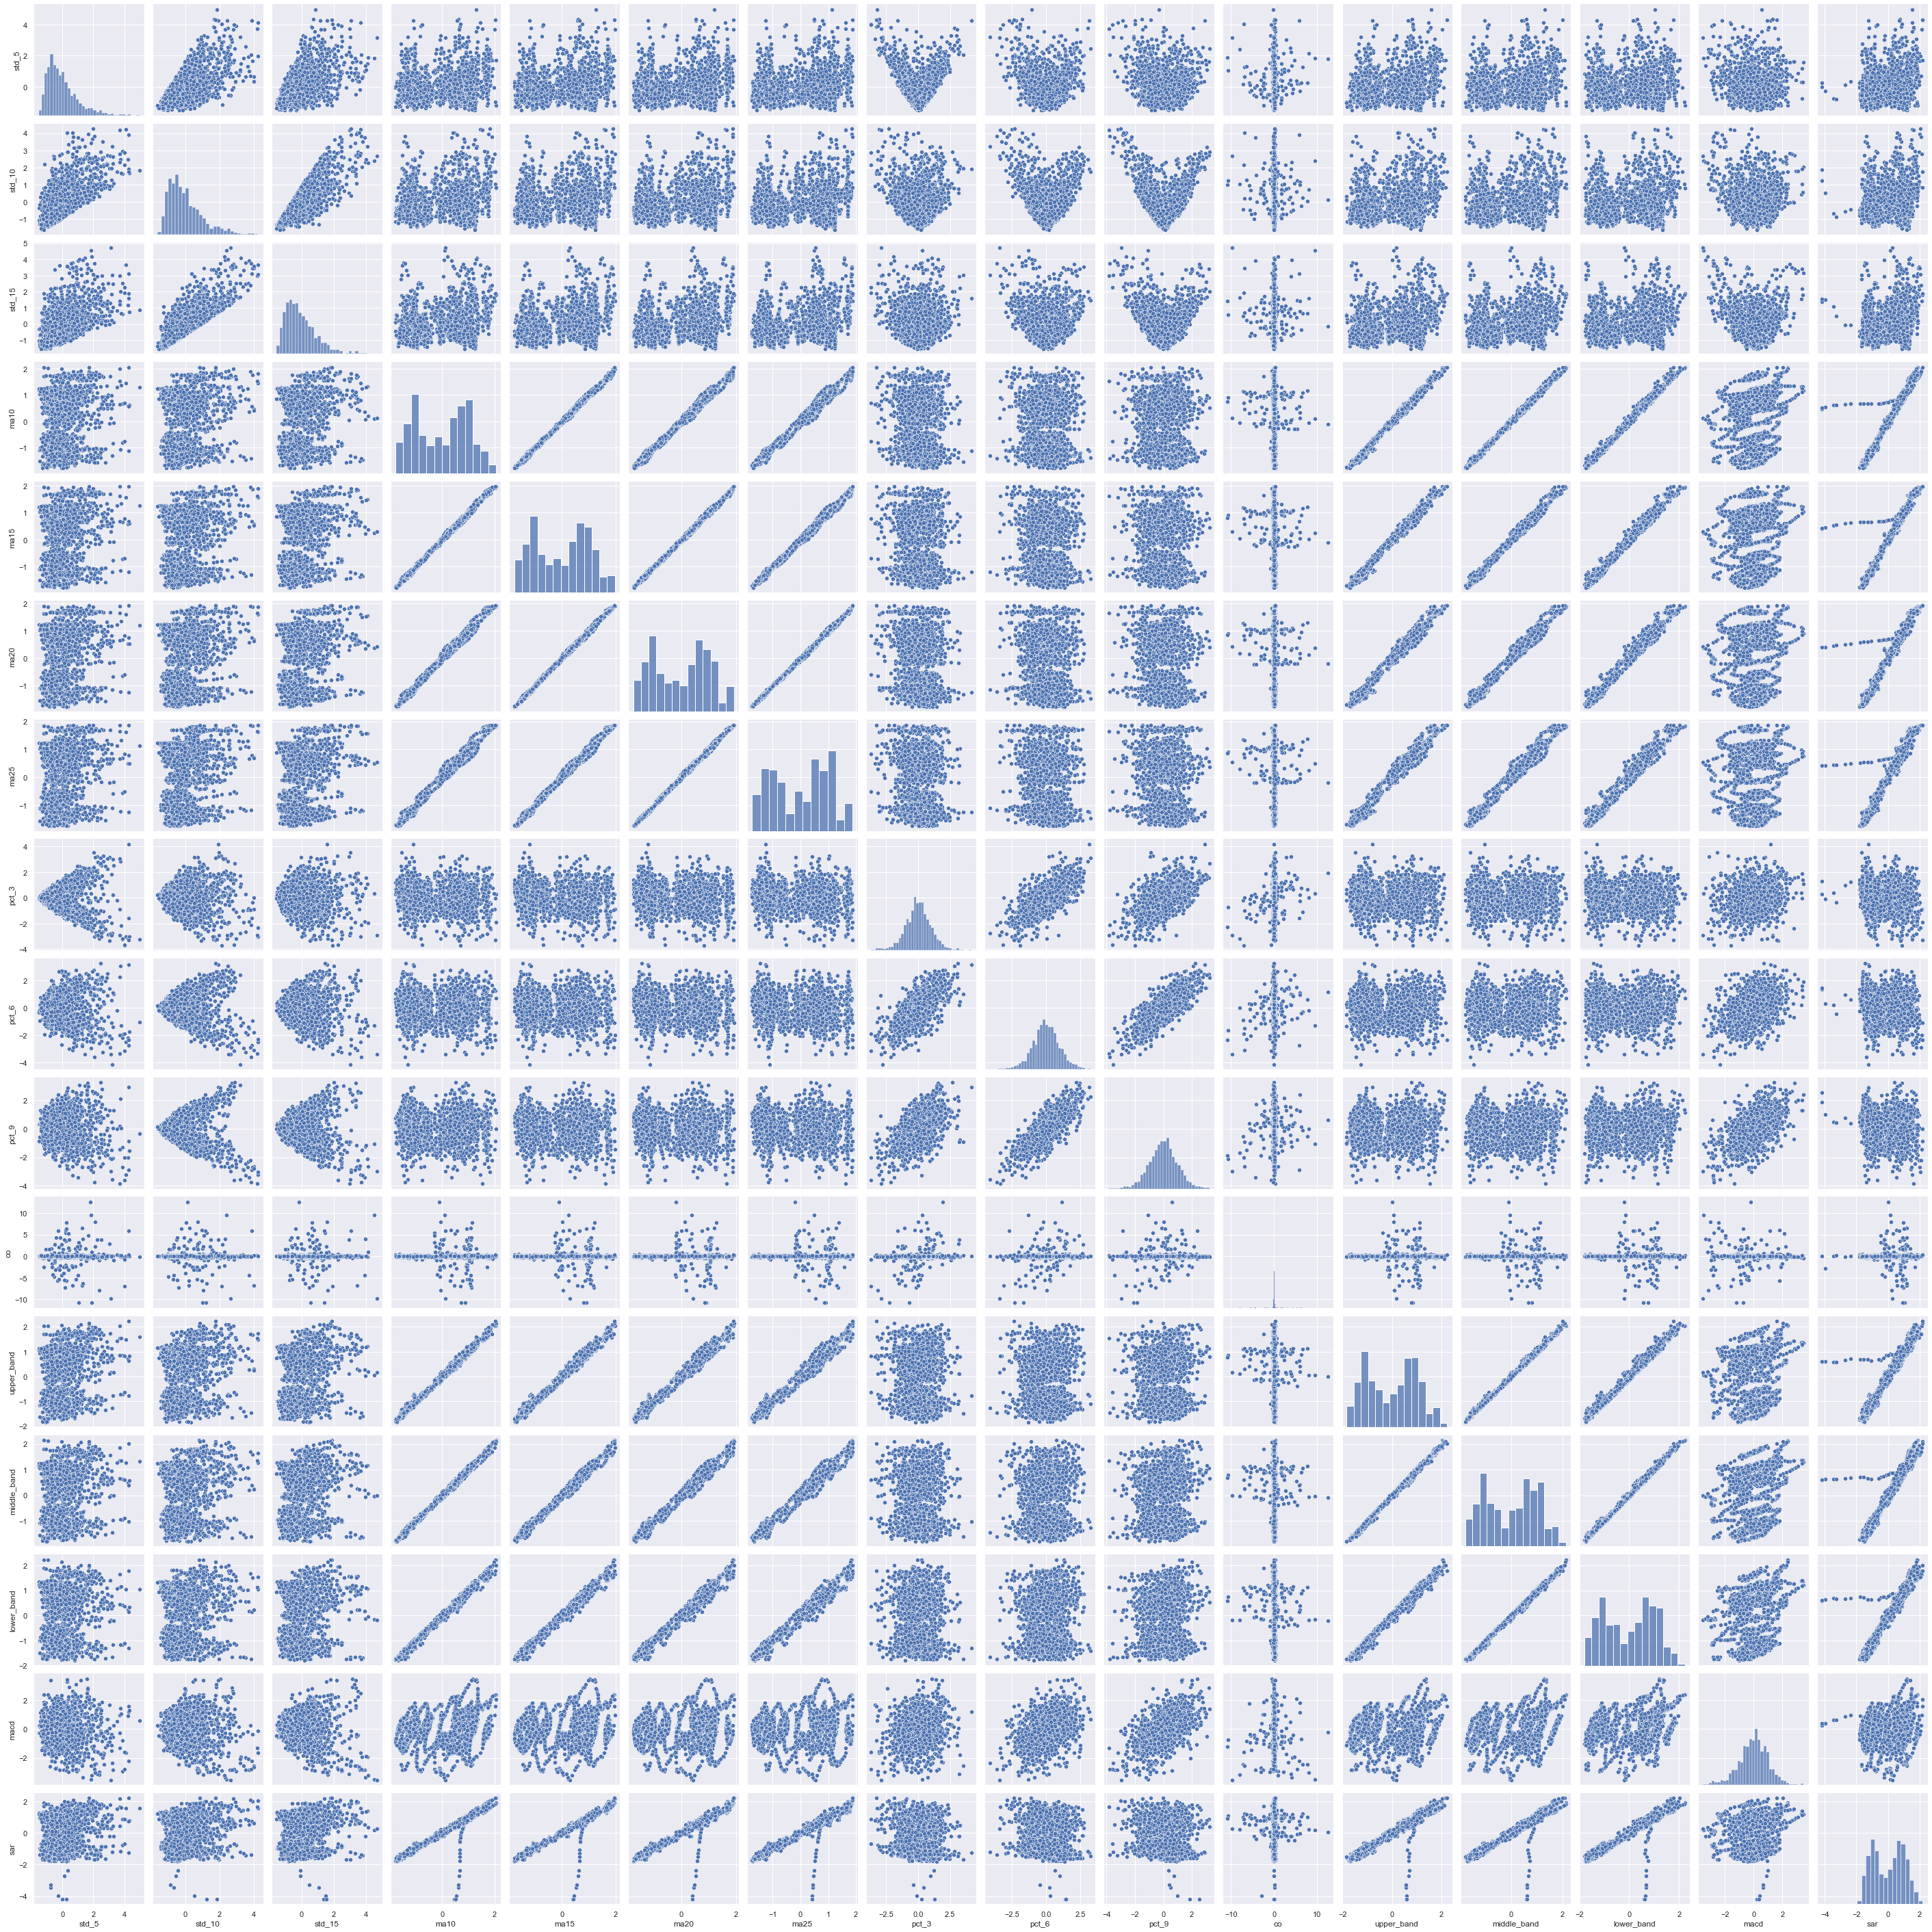

In [38]:

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
sns.pairplot(X_train_scaled_df[feature_list])

In [41]:
X_train_scaled_df.describe().round(3).T

count  mean  std     min    25%    50%    75%     max
std_5        1848.0   0.0  1.0  -1.532 -0.718 -0.232  0.430   4.982
std_10       1848.0  -0.0  1.0  -1.615 -0.744 -0.224  0.511   4.257
std_15       1848.0  -0.0  1.0  -1.546 -0.727 -0.228  0.509   4.712
ma10         1848.0   0.0  1.0  -1.784 -0.979  0.097  0.855   2.056
ma15         1848.0   0.0  1.0  -1.767 -0.997  0.113  0.861   1.970
ma20         1848.0   0.0  1.0  -1.759 -1.003  0.110  0.859   1.921
ma25         1848.0   0.0  1.0  -1.741 -1.017  0.121  0.850   1.880
pct_3        1848.0   0.0  1.0  -3.698 -0.600  0.002  0.612   4.187
pct_6        1848.0  -0.0  1.0  -4.118 -0.599 -0.005  0.608   3.244
pct_9        1848.0   0.0  1.0  -3.845 -0.623  0.018  0.620   3.231
co           1848.0   0.0  1.0 -10.786 -0.047 -0.001  0.055  12.592
upper_band   1848.0  -0.0  1.0  -1.840 -0.979  0.115  0.852   2.233
middle_band  1848.0  -0.0  1.0  -1.799 -0.971  0.095  0.856   2.141
lower_band   1848.0  -0.0  1.0  -1.804 -0.985  0.103  0.866   2.229
macd         1848.0   0.0  1.0  -3.515 -0.578  0.060  0.657   3.475
sar          1848.0  -0.0  1.0  -4.181 -0.912  0.102  0.849   2.200

In [42]:
from sklearn.neural_network import MLPClassifier

In [44]:
model = MLPClassifier(hidden_layer_sizes = (5), verbose = True, random_state=10)

model.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.76628486
Iteration 2, loss = 0.74753047
Iteration 3, loss = 0.73434950
Iteration 4, loss = 0.72389385
Iteration 5, loss = 0.71685260
Iteration 6, loss = 0.71183024
Iteration 7, loss = 0.70814969
Iteration 8, loss = 0.70540536
Iteration 9, loss = 0.70338793
Iteration 10, loss = 0.70164842
Iteration 11, loss = 0.70032612
Iteration 12, loss = 0.69923236
Iteration 13, loss = 0.69818286
Iteration 14, loss = 0.69752062
Iteration 15, loss = 0.69683129
Iteration 16, loss = 0.69628004
Iteration 17, loss = 0.69564851
Iteration 18, loss = 0.69524265
Iteration 19, loss = 0.69481780
Iteration 20, loss = 0.69442118
Iteration 21, loss = 0.69408660
Iteration 22, loss = 0.69370705
Iteration 23, loss = 0.69338172
Iteration 24, loss = 0.69299780
Iteration 25, loss = 0.69267829
Iteration 26, loss = 0.69248016
Iteration 27, loss = 0.69218566
Iteration 28, loss = 0.69193158
Iteration 29, loss = 0.69175940
Iteration 30, loss = 0.69156088
Iteration 31, loss = 0.69134209
Iteration 32, los

MLPClassifier(hidden_layer_sizes=5, random_state=10, verbose=True)

In [45]:
#properties
model.n_layers_

3

In [47]:
#print Weights

print(model.coefs_[0])

[[ 0.20209663 -0.53864047  0.21139501  0.31155413  0.06640567]
 [-0.25565154 -0.27892692  0.37364048 -0.43242407 -0.40249286]
 [ 0.12791701  0.42796474 -0.47524891 -0.04771295  0.41712417]
 [ 0.07032952  0.13121494 -0.27673095  0.44798961  0.26873314]
 [-0.00377703 -0.48832063 -0.19106297  0.19400872 -0.01650378]
 [-0.1284137   0.02047882 -0.04962091  0.1810069   0.16589132]
 [ 0.26604875 -0.0814145   0.36969675 -0.16424394 -0.36434639]
 [-0.11551973 -0.42865424  0.28029499 -0.57880166 -0.02504599]
 [ 0.10294921  0.38041841 -0.28472803  0.36935122 -0.32855133]
 [ 0.15918253 -0.18656166  0.26463598 -0.30912196 -0.41429601]
 [-0.06984319 -0.33008702  0.08458908 -0.52919505 -0.08282588]
 [ 0.41703108  0.41221242 -0.0999061   0.35120022 -0.22407886]
 [ 0.04932851  0.32184309 -0.02108684  0.09787723 -0.45426547]
 [-0.20401293 -0.55781673 -0.27087694 -0.18051429  0.3254228 ]
 [-0.35033573  0.010123   -0.03038961 -0.17182227 -0.41384268]
 [-0.40076403  0.36314569  0.27524027  0.33162673 -0.19

In [48]:
#weights between hidden layer and output l ayer

print(model.coefs_[1])

[[-0.70144423]
 [-0.33422585]
 [-0.36127386]
 [ 0.18366618]
 [ 0.25522286]]


In [49]:
#check the model accuracyon training data

print(model.score(X_train_scaled, y_train))

0.5362554112554112


In [50]:
#Accuracy on testing data
print(model.score(X_test_scaled, y_test))

0.474025974025974


In [51]:
model.predict_proba(X_test_scaled)

array([[0.59425785, 0.40574215],
       [0.59221195, 0.40778805],
       [0.50853159, 0.49146841],
       [0.51393801, 0.48606199],
       [0.51269861, 0.48730139],
       [0.46811797, 0.53188203],
       [0.49139743, 0.50860257],
       [0.50278166, 0.49721834],
       [0.58439532, 0.41560468],
       [0.4966446 , 0.5033554 ],
       [0.44097779, 0.55902221],
       [0.46363089, 0.53636911],
       [0.52678335, 0.47321665],
       [0.37452553, 0.62547447],
       [0.4619127 , 0.5380873 ],
       [0.44868627, 0.55131373],
       [0.54813497, 0.45186503],
       [0.44372467, 0.55627533],
       [0.50806096, 0.49193904],
       [0.40953522, 0.59046478],
       [0.50650797, 0.49349203],
       [0.38790899, 0.61209101],
       [0.44287226, 0.55712774],
       [0.51840263, 0.48159737],
       [0.54659373, 0.45340627],
       [0.44415848, 0.55584152],
       [0.48321375, 0.51678625],
       [0.42533167, 0.57466833],
       [0.43427447, 0.56572553],
       [0.55232119, 0.44767881],
       [0.

In [52]:
# Now lets Backtest

In [53]:
def backtest(df, model):
    # Copy data
    data = df.copy()
    
    # Create returns
    data['returns'] = np.log(data['Close'] / data['Close'].shift(1))
    # Creating features
    features_list = []

    # SD based features
    for i in range(5, 20, 5):
        col_name = 'std_' + str(i)
        data[col_name] = data['Close'].rolling(window=i).std()
        features_list.append(col_name)

    # MA based features
    for i in range(10, 30, 5):
        col_name = 'ma_' + str(i)
        data[col_name] = data['Close'].rolling(window=i).mean()
        features_list.append(col_name)

    # Daily pct change based features
    for i in range(3, 12, 3):
        col_name = 'pct_' + str(i)
        data[col_name] = data['Close'].pct_change().rolling(i).sum()
        features_list.append(col_name)

    # Intraday movement
    col_name = 'co'
    data[col_name] = data['Close'] - data['Open']
    features_list.append(col_name)
    # Create features
    data['upper_band'], data['middle_band'], data['lower_band'] = ta.BBANDS(data['Close'].values)
    data['macd'], data['macdsignal'], data['macdhist'] = ta.MACD(data['Close'].values)
    data['sar'] = ta.SAR(data['High'].values, data['Low'].values)
    features_list +=['upper_band','middle_band','lower_band','macd','sar']
    # Create target
    data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
    
    # Drop null values
    data.dropna(inplace=True)
    
    # Create feature matrix and target vector
    X = data[features_list]
    y = data['target']
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Predict
    y_pred = model.predict(X_scaled)
    
    data['predicted'] = y_pred
    
    # Create strategy returns
    data['strategy_returns'] = data['returns'].shift(-1) * data['predicted']
    
    # Return the last cumulative return
    bnh_returns = data['returns'].cumsum()[-1]
    
    # Return the last cumulative strategy return
    # we need to drop the last nan value
    data.dropna(inplace=True)
    strategy_returns = data['strategy_returns'].cumsum()[-1]
    
    plt.figure(figsize=(10, 6))
    plt.plot(data['returns'].cumsum())
    plt.plot(data['strategy_returns'].cumsum())
    plt.xlabel('Time')
    plt.ylabel('Cumulative Returns')
    plt.title('Returns Comparison')
    plt.legend()
    plt.show()
    
    return bnh_returns, strategy_returns

No handles with labels found to put in legend.


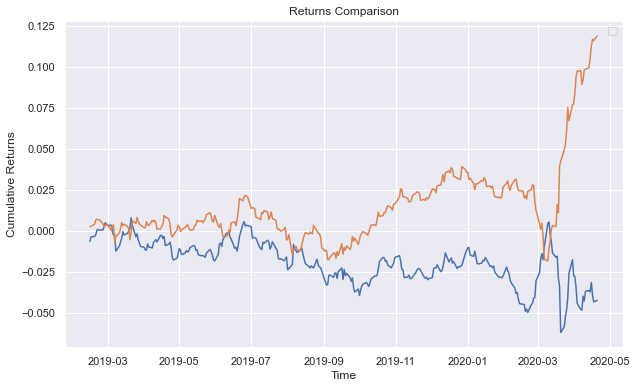

Buy and hold returns -0.044937002315672055
Strategy Returns 0.11867022555732894


In [54]:
backtest_data = pd.read_csv('EURUSD_backtest.csv' , index_col = 0 , parse_dates = True)

bnh_returns , strategy_returns = backtest(backtest_data, model)
print('Buy and hold returns', bnh_returns)
print('Strategy Returns', strategy_returns)

No handles with labels found to put in legend.


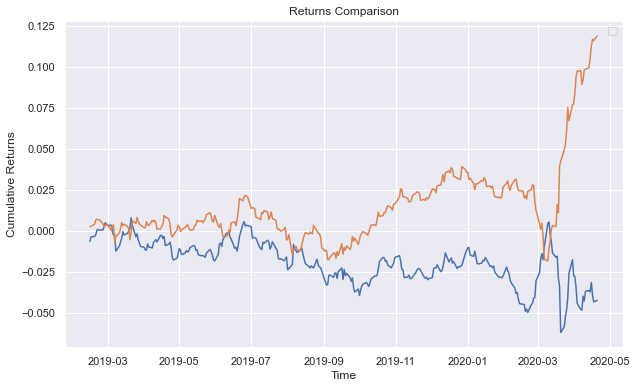

Buy and Hold Returns: -0.044937002315672055
Strategy Returns: 0.11867022555732894


In [59]:
bnh_returns, s_returns = backtest(backtest_data , model             )

print('Buy and Hold Returns:', bnh_returns)
print('Strategy Returns:', s_returns)